In [1]:
import scipy.optimize as spo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### functions

In [1]:
import scipy.special #sigmoid function
sigmoid=lambda x: scipy.special.expit(x)

/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### minimal

In [2]:
def error(line,data):
    #line= slope,intercept
    err=np.sum((data[:,1]-(line[0]*data[:,0]+line[1]))**2)
    return err

In [3]:
def fit_line(data,err_func):
    l=np.float32([0,np.mean(data[:,1])]) #initial guess
    x_ends=np.float32([-5,5])
    print(x_ends)
    plt.plot(x_ends,l[0]*x_ends+l[1],'m--',linewidth=1,label='initial guess')
    result=spo.minimize(err_func,l,args=(data,),method='SLSQP',options={'disp':True})
    return result.x

In [6]:
def run():
    l_orig=np.float32([4,2])
    print('original line is slope={} y-intercept={}'.format(l_orig[0],l_orig[1]))
    Xorig=np.linspace(0,10,21)
    Yorig=l_orig[0]*Xorig+l_orig[1]
    plt.plot(Xorig,Yorig,linewidth=1,label="original line")
    
    noise_sigma=3.0 #std
    noise=np.random.normal(0,noise_sigma,Yorig.shape)
    data=np.asarray([Xorig,Yorig+noise]).T
    print(data)
    plt.plot(data[:,0],data[:,1],'go',label='Data points')
    
    l_fit=fit_line(data,error)
    print('filled line c0={} c1={}'.format(l_fit[0],l_fit[1]))
    plt.plot(data[:,0],l_fit[0]*data[:,0]+l_fit[1],'r--',linewidth=1,label='fit line')

original line is slope=4.0 y-intercept=2.0
[[ 0.          4.92168916]
 [ 0.5         7.11559413]
 [ 1.          5.94105773]
 [ 1.5         2.7454513 ]
 [ 2.          6.60767641]
 [ 2.5        14.73164184]
 [ 3.         12.34758815]
 [ 3.5        17.05552243]
 [ 4.         17.19007034]
 [ 4.5        18.61589378]
 [ 5.         21.28381991]
 [ 5.5        27.22425435]
 [ 6.         27.22682688]
 [ 6.5        29.14432241]
 [ 7.         27.39360614]
 [ 7.5        28.45405337]
 [ 8.         32.28213326]
 [ 8.5        39.04274213]
 [ 9.         36.86421553]
 [ 9.5        45.27330663]
 [10.         45.50272501]]
[-5.  5.]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 152.29351441930277
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
filled line c0=4.15191356280638 c1=1.4768285603701552


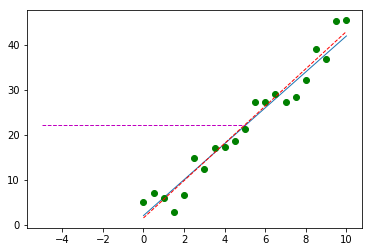

In [7]:
run()